In [1]:
from sys import path

path +=['..']

from mylib import driwers as dr
import cv2
import ipywidgets
from mylib import Motor
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
resolution = 1920, 1080

In [15]:
print(dr.motor.list_available_devices())
motM = dr.motor(90113195)
motorM = Motor(motM, 'motor', blocking=True)

cam = cv2.VideoCapture(1)
cam.set(cv2.CAP_PROP_FRAME_WIDTH, resolution[0])
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, resolution[1])

[(13, 90113195), (13, 90113196), (13, 90113197)]


True

for a in range(12, 53, 3):
    motM.move_to(a, blocking=True)
    pygame.image.save(cam.get_image(), f'testPic/a{a}.jpg')

<IPython.core.display.Javascript object>


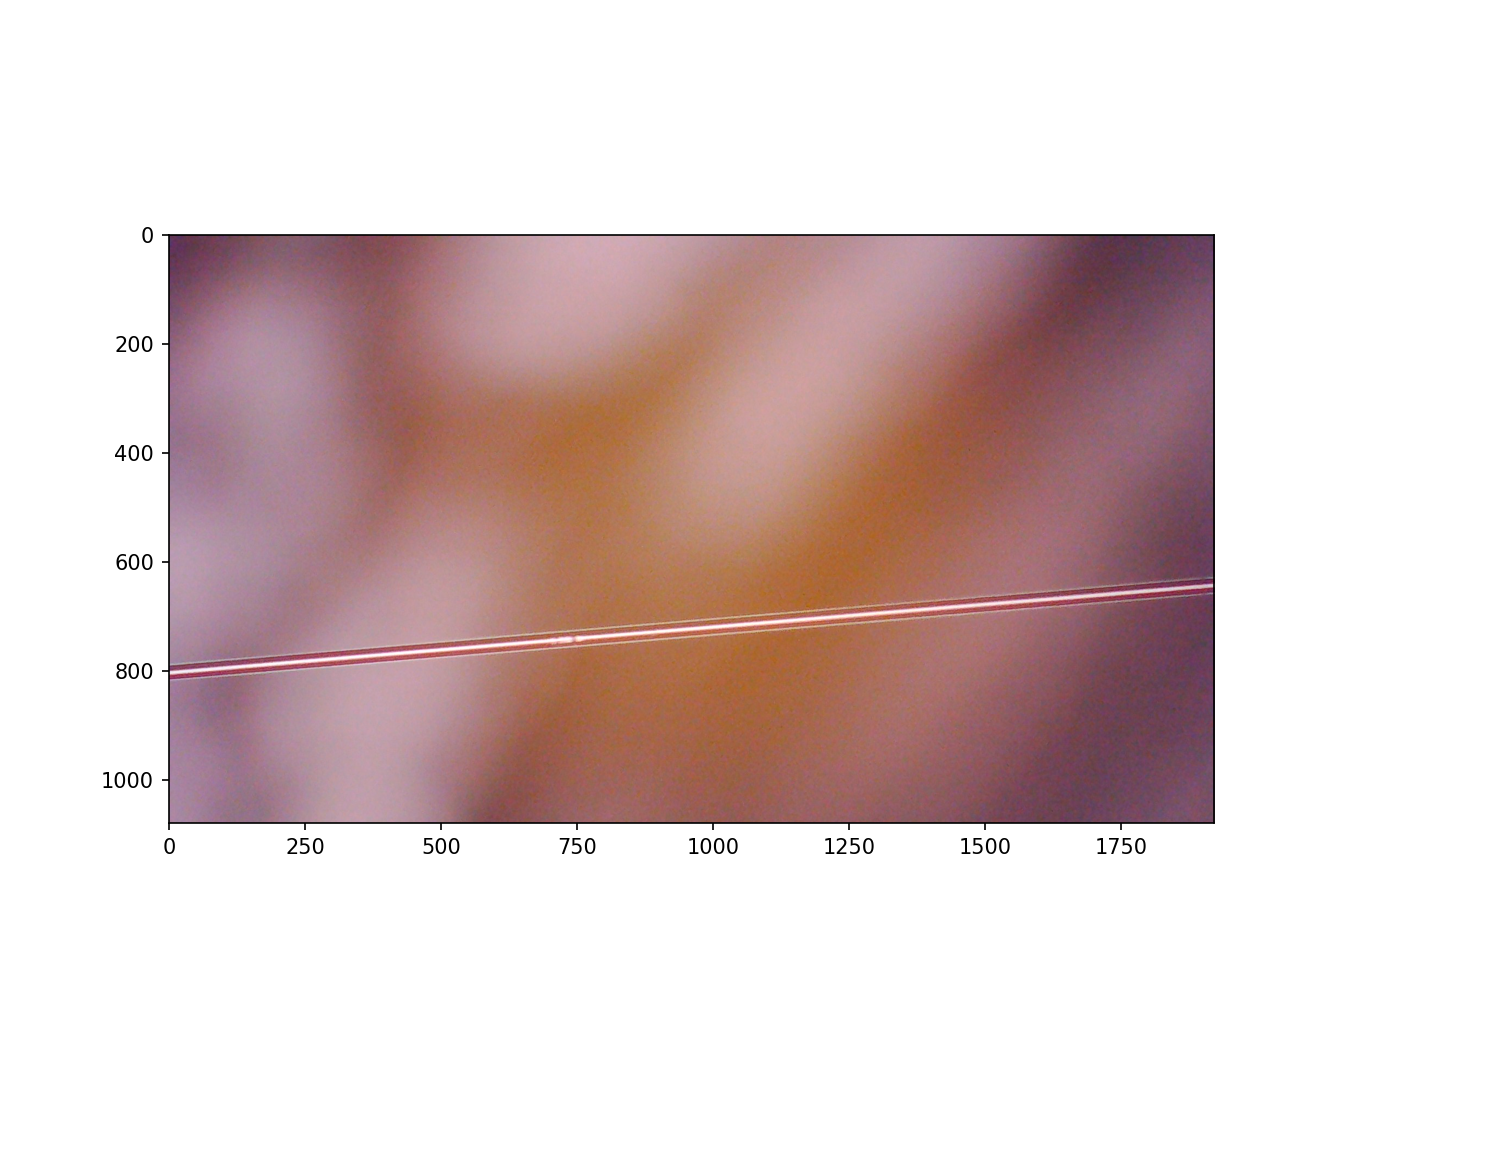

GridspecLayout(children=(GridspecLayout(children=(Button(description='Backwards', layout=Layout(grid_area='wid…

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
def takeAndShow():
    result, image = cam.read()
    ax.clear()
    ax.imshow(image)
    fig.canvas.draw()
    return image

def moveForw(btn=None, flag=None):

    motorM.Move(1)
    takeAndShow();
def moveBack(btn=None, flag=None):
    motorM.Move(-1)
    takeAndShow();
def moveNext(btn=None, flag=None):
    motorM.Move(3)
    cv2.imwrite(f'testPic/im{motorM.Getposition()}.jpg', takeAndShow())

buttonBack = ipywidgets.widgets.Button(description='Backwards')
buttonForw = ipywidgets.widgets.Button(description='Forwards')
buttonNext = ipywidgets.widgets.Button(description='Next')

buttonBack.on_click(moveBack)
buttonForw.on_click(moveForw)
buttonNext.on_click(moveNext)

grid0 = ipywidgets.GridspecLayout(2, 1)
grid = ipywidgets.GridspecLayout(1, 3)
grid[0, 0] = buttonBack
grid[0, 1] = buttonForw
grid[0, 2] = buttonNext
grid0[0, 0] = grid
display(grid0)

takeAndShow();

Перемещение на начальную позицию перед выключением:

In [ ]:
motorM.MoveTo(0)